# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as sc

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [9]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 626


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [14]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        if (response.status_code ==200):
            city_weather = response.json()

            # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
            city = city_weather.get("name")
            city_lat = city_weather.get("coord", {}).get("lat")
            city_lng = city_weather.get("coord", {}).get("lon")
            city_max_temp = city_weather.get("main", {}).get("temp_max")
            city_humidity = city_weather.get("main", {}).get("humidity")
            city_clouds = city_weather.get("clouds", {}).get("all")
            city_wind = city_weather.get("wind", {}).get("speed")
            city_country = city_weather.get("sys", {}).get("country")
            city_date = city_weather.get("dt")
    
            # Append the City information into city_data list
            city_data.append({"City": city,
                              "Lat": city_lat,
                              "Lng": city_lng,
                              "Max Temp": city_max_temp,
                              "Humidity": city_humidity,
                              "Cloudiness": city_clouds,
                              "Wind Speed": city_wind,
                              "Country": city_country,
                              "Date": city_date})
        else:
            print(f"The API presented a non-200 status code: {response.status_code} for city {city}")
            print()

    # If an error is experienced, skip the city
    except Exception as e:
        print(f"Error occurred for city {city}: {str(e)}")
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bredasdorp
Processing Record 2 of Set 1 | georgetown
Processing Record 3 of Set 1 | kapuskasing
Processing Record 4 of Set 1 | port elizabeth
Processing Record 5 of Set 1 | juneau
Processing Record 6 of Set 1 | la haute-saint-charles
The API presented a non-200 status code: 404 for city la haute-saint-charles

Processing Record 7 of Set 1 | ikovka
Processing Record 8 of Set 1 | haiku-pauwela
Processing Record 9 of Set 1 | vernon
Processing Record 10 of Set 1 | nar'yan-mar
Processing Record 11 of Set 1 | videira
Processing Record 12 of Set 1 | viedma
Processing Record 13 of Set 1 | waitangi
Processing Record 14 of Set 1 | edinburgh of the seven seas
Processing Record 15 of Set 1 | puerto ayora
Processing Record 16 of Set 1 | constantia
Processing Record 17 of Set 1 | hamilton
Processing Record 18 of Set 1 | charlestown
Processing Record 19 of Set 1 | port-aux-francais
Processing Record 20 of Set 1

In [16]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          598
Lat           598
Lng           598
Max Temp      598
Humidity      598
Cloudiness    598
Wind Speed    598
Country       598
Date          598
dtype: int64

In [18]:
# Convert date/time
city_data_df['Date'] = pd.to_datetime(city_data_df['Date'], unit='s')

# Format the 'Date' column to 'month/day/year'
city_data_df['Date'] = city_data_df['Date'].dt.strftime('%m/%d/%Y')

In [20]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bredasdorp,-34.5322,20.0403,62.13,65,59,21.65,ZA,11/26/2024
1,George Town,5.4112,100.3354,78.73,88,40,5.99,MY,11/26/2024
2,Kapuskasing,49.4169,-82.4331,30.29,100,100,4.61,CA,11/26/2024
3,Port Elizabeth,-33.9180,25.5701,68.29,75,0,13.80,ZA,11/26/2024
4,Juneau,58.3019,-134.4197,32.00,95,100,8.05,US,11/26/2024


In [22]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [24]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Bredasdorp,-34.5322,20.0403,62.13,65,59,21.65,ZA,11/26/2024
1,George Town,5.4112,100.3354,78.73,88,40,5.99,MY,11/26/2024
2,Kapuskasing,49.4169,-82.4331,30.29,100,100,4.61,CA,11/26/2024
3,Port Elizabeth,-33.9180,25.5701,68.29,75,0,13.80,ZA,11/26/2024
4,Juneau,58.3019,-134.4197,32.00,95,100,8.05,US,11/26/2024


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

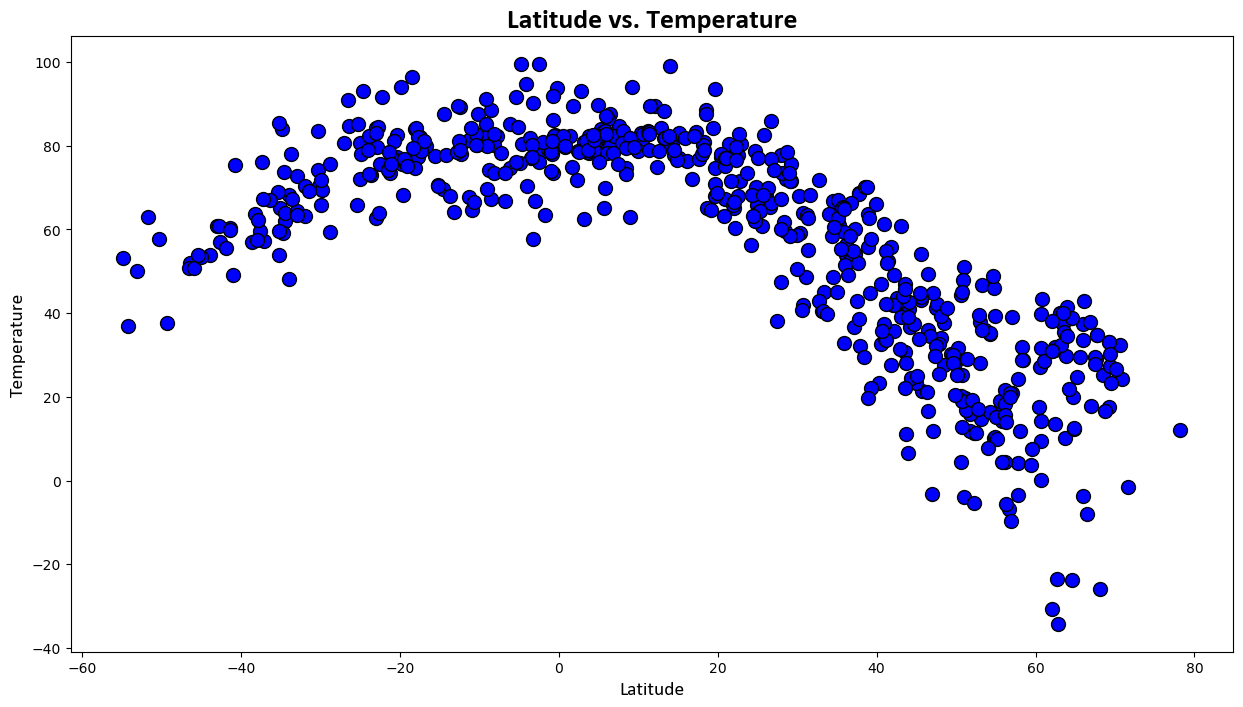

In [27]:
# Build scatter plot for latitude vs. temperature
# Canvas Size
plt.figure(figsize=(15, 8))

# Create Plot
plt.scatter(city_data_df.Lat, city_data_df["Max Temp"], color="blue", edgecolor="black", s=100)

# Incorporate the other graph properties
plt.xlabel("Latitude", fontfamily="Calibri", fontsize=14)
plt.ylabel("Temperature", fontfamily="Calibri", fontsize=14)
plt.title("Latitude vs. Temperature", fontweight="bold", fontfamily="Calibri", fontsize=20)
          
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

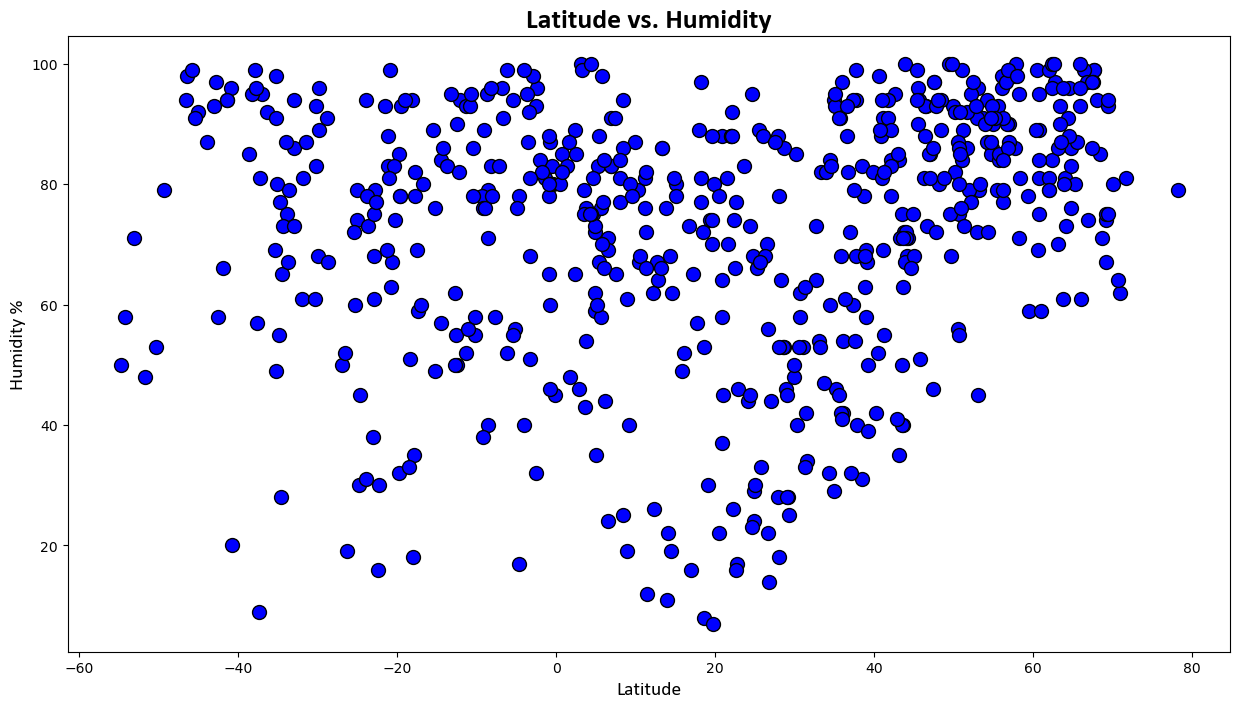

In [30]:
# Build the scatter plots for latitude vs. humidity
# Canvas Size
plt.figure(figsize=(15, 8))

# Create Plot
plt.scatter(city_data_df.Lat, city_data_df.Humidity, color="blue", edgecolor="black", s=100)

# Incorporate the other graph properties
plt.xlabel("Latitude", fontfamily="Calibri", fontsize=14)
plt.ylabel("Humidity %", fontfamily="Calibri", fontsize=14)
plt.title("Latitude vs. Humidity", fontweight="bold", fontfamily="Calibri", fontsize=20)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

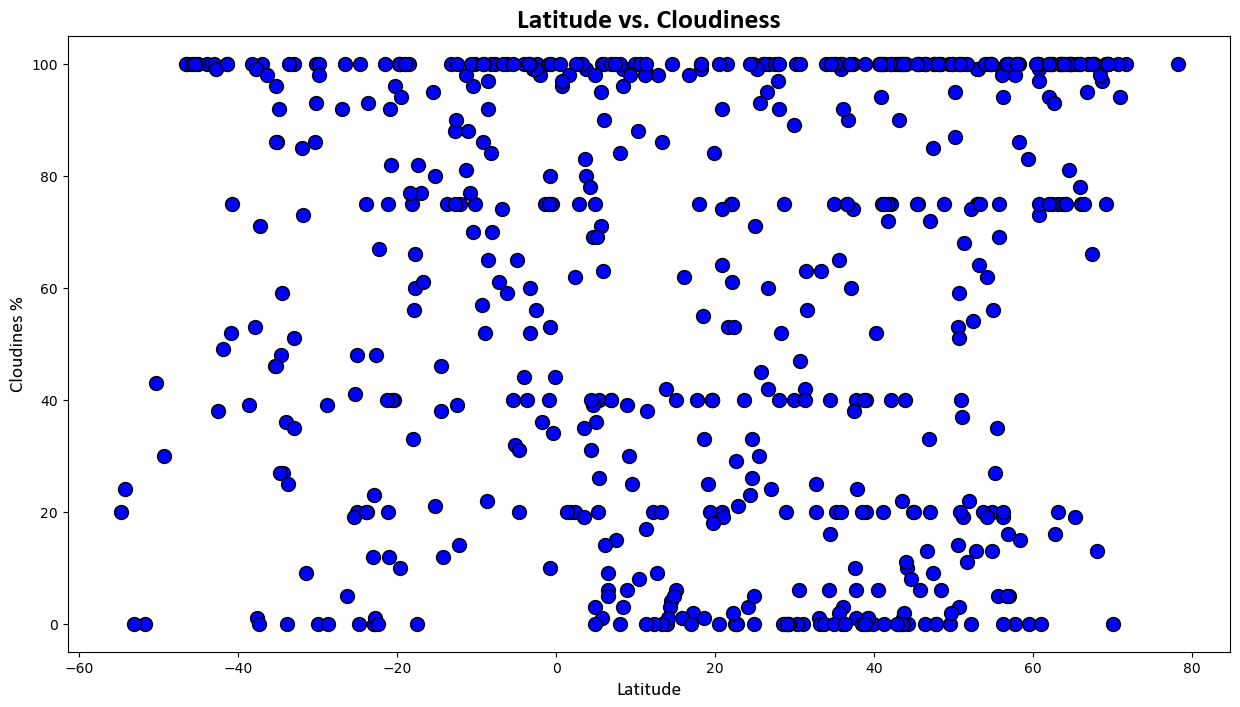

In [33]:
# Build the scatter plots for latitude vs. cloudiness
# Canvas Size
plt.figure(figsize=(15, 8))

# Create Plot
plt.scatter(city_data_df.Lat, city_data_df.Cloudiness, color="blue", edgecolor="black", s=100)

# Incorporate the other graph properties
plt.xlabel("Latitude", fontfamily="Calibri", fontsize=14)
plt.ylabel("Cloudines %", fontfamily="Calibri", fontsize=14)
plt.title("Latitude vs. Cloudiness", fontweight="bold", fontfamily="Calibri", fontsize=20)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

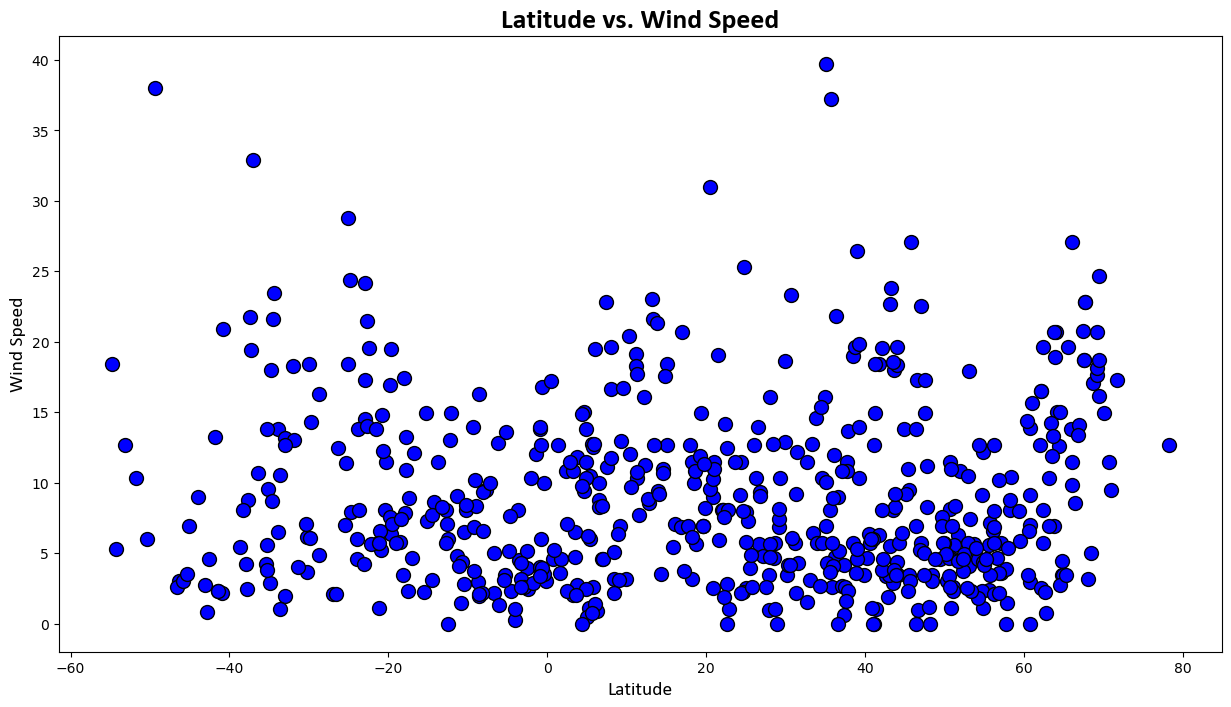

In [36]:
# Build the scatter plots for latitude vs. wind speed
# Canvas Size
plt.figure(figsize=(15, 8))

# Create Plot
plt.scatter(city_data_df.Lat, city_data_df["Wind Speed"], color="blue", edgecolor="black", s=100)

# Incorporate the other graph properties
plt.xlabel("Latitude", fontfamily="Calibri", fontsize=14)
plt.ylabel("Wind Speed", fontfamily="Calibri", fontsize=14)
plt.title("Latitude vs. Wind Speed", fontweight="bold", fontfamily="Calibri", fontsize=20)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [39]:
# Define a function to create Linear Regression plots
def do_regression_plot(x_values, y_values, x_label, y_label, annotation):
    # Perform Regression
    (slope, intercept, rvalue, pvalue, stderr) = sc.linregress(x_values, y_values)
    regress_values = x_values * slope +intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    print(line_eq)

    # Canvas Size
    plt.figure(figsize=(15, 8))

    # Create Plot
    plt.scatter(x_values, y_values, color="blue", edgecolor="black", s=100)
    plt.plot(x_values, regress_values, color="black", linewidth=3)

    # Incorporate the other graph properties
    plt.xlabel(x_label, fontfamily="Calibri", fontsize=14)
    plt.ylabel(y_label, fontfamily="Calibri", fontsize=14)
    plt.title(f"{x_label} vs. {y_label}", fontweight="bold", fontfamily="Calibri", fontsize=20)
    
    # Background Grid
    plt.grid(linestyle = "--", color = "lightgrey", alpha = 0.75)
    
    #Annotation
    plt.annotate(line_eq, annotation, fontsize = 14, color = "black")
    
    # Show Graph
    plt.show

In [41]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df.Lat >= 0].reset_index(drop=True)

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,George Town,5.4112,100.3354,78.73,88,40,5.99,MY,11/26/2024
1,Kapuskasing,49.4169,-82.4331,30.29,100,100,4.61,CA,11/26/2024
2,Juneau,58.3019,-134.4197,32.00,95,100,8.05,US,11/26/2024
3,Ikovka,55.6089,64.9375,17.47,93,5,2.39,RU,11/26/2024
4,Haiku-Pauwela,20.9219,-156.3051,67.21,88,20,8.99,US,11/26/2024


In [43]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df.Lat < 0].reset_index(drop=True)

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bredasdorp,-34.5322,20.0403,62.13,65,59,21.65,ZA,11/26/2024
1,Port Elizabeth,-33.9180,25.5701,68.29,75,0,13.80,ZA,11/26/2024
2,Videira,-27.0083,-51.1517,80.64,50,92,2.13,BR,11/26/2024
3,Viedma,-40.8135,-62.9967,75.51,20,75,20.92,AR,11/26/2024
4,Waitangi,-43.9535,-176.5597,53.82,87,100,8.99,NZ,11/26/2024


###  Temperature vs. Latitude Linear Regression Plot

y = -1.17x + 92.21


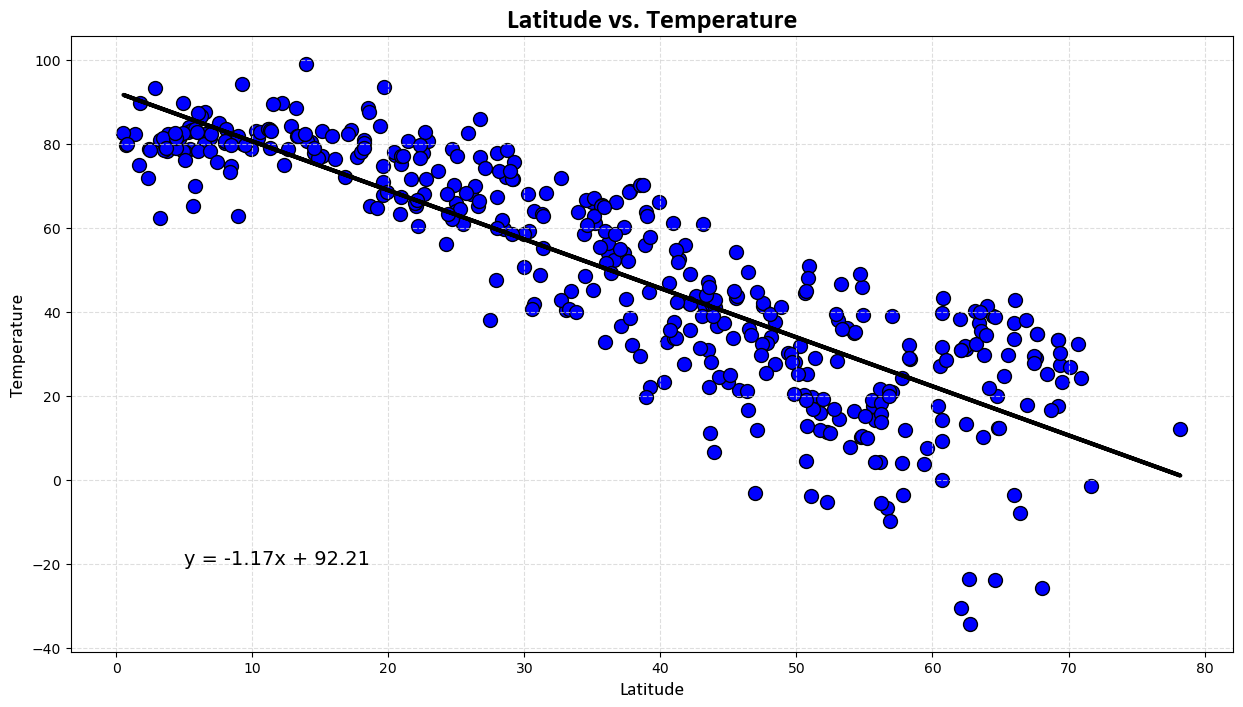

In [48]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df.Lat
y_values = northern_hemi_df["Max Temp"]
x_label = "Latitude"
y_label = "Temperature"
annotation = (5, -20)
do_regression_plot(x_values, y_values, x_label, y_label, annotation)

y = 0.55x + 85.31


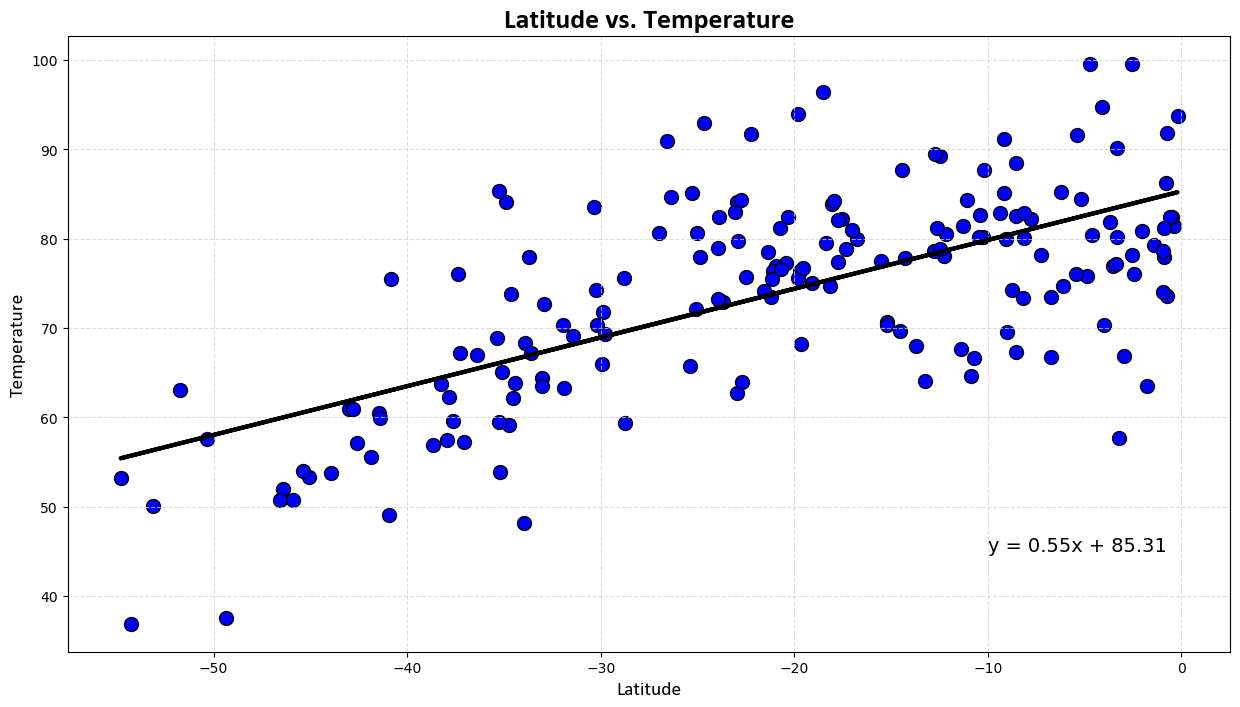

In [54]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df.Lat
y_values = southern_hemi_df["Max Temp"]
x_label = "Latitude"
y_label = "Temperature"
annotation = (-10, 45)
do_regression_plot(x_values, y_values, x_label, y_label, annotation)

**Discussion about the linear relationship:** The above regression analysis shows a strong negative correlation between latitude and temperature in the northern hemisphere and a moderate positive correlation between latitude and temperature in the southern hemisphere. While the relationship in the northern hemisphere is more pronounced, both regressions indicate that temperature increases as latitude get closer to the equator. 

### Humidity vs. Latitude Linear Regression Plot

y = 0.38x + 58.64


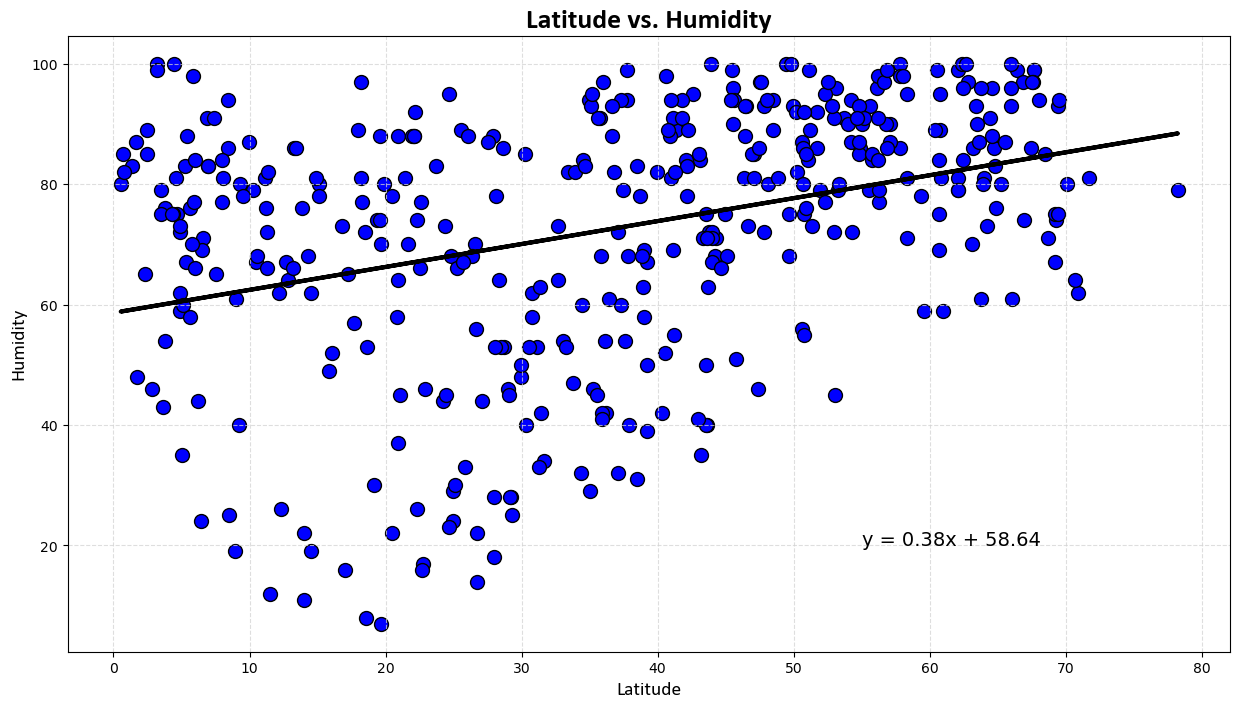

In [60]:
# Northern Hemisphere
x_values = northern_hemi_df.Lat
y_values = northern_hemi_df.Humidity
x_label = "Latitude"
y_label = "Humidity"
annotation = (55, 20)
do_regression_plot(x_values, y_values, x_label, y_label, annotation)

y = -0.02x + 72.09


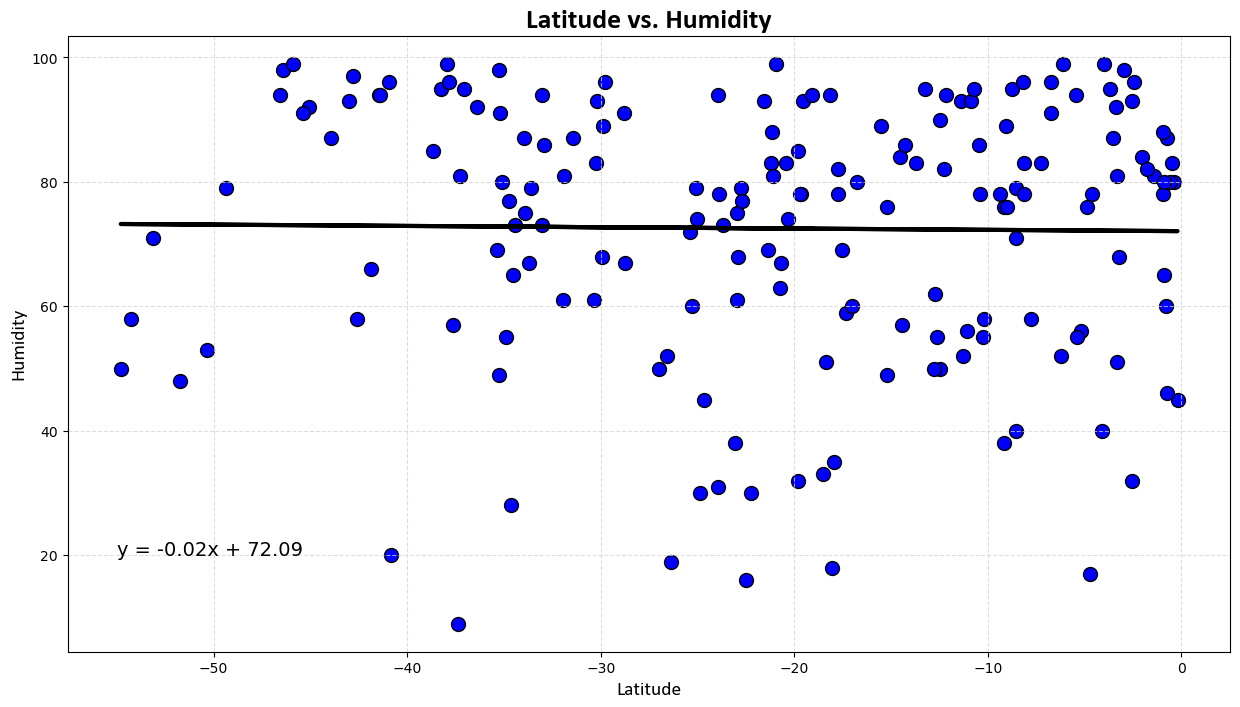

In [70]:
# Southern Hemisphere
x_values = southern_hemi_df.Lat
y_values = southern_hemi_df.Humidity
x_label = "Latitude"
y_label = "Humidity"
annotation = (-55, 20)
do_regression_plot(x_values, y_values, x_label, y_label, annotation)

**Discussion about the linear relationship:** In the northern hemisphere, latitude and humidity show a weak positive relationship, which was initially surprising to me; however, the more I thought through this outcome, the more it made sense. Globally, the largest areas of arid climate and desert regions sit at or just north of the equator. As a result, one would expect humidity in these regions of the northern hemisphere to be lower than regions further north. In contrast, the southern hemisphere does not have such a pronounced band of arid and desert regions as latitude moves away from the equator. In fact, the largest land mass of desert space in the southern hemisphere (excluding Antarctica) appears in Australia, which is substantially further from the equator in comparison to the northern hemisphere desert regions. As a result, we see nearly no correlation between humidity and latitude in the southern hemisphere.  

### Cloudiness vs. Latitude Linear Regression Plot

y = 0.42x + 41.41


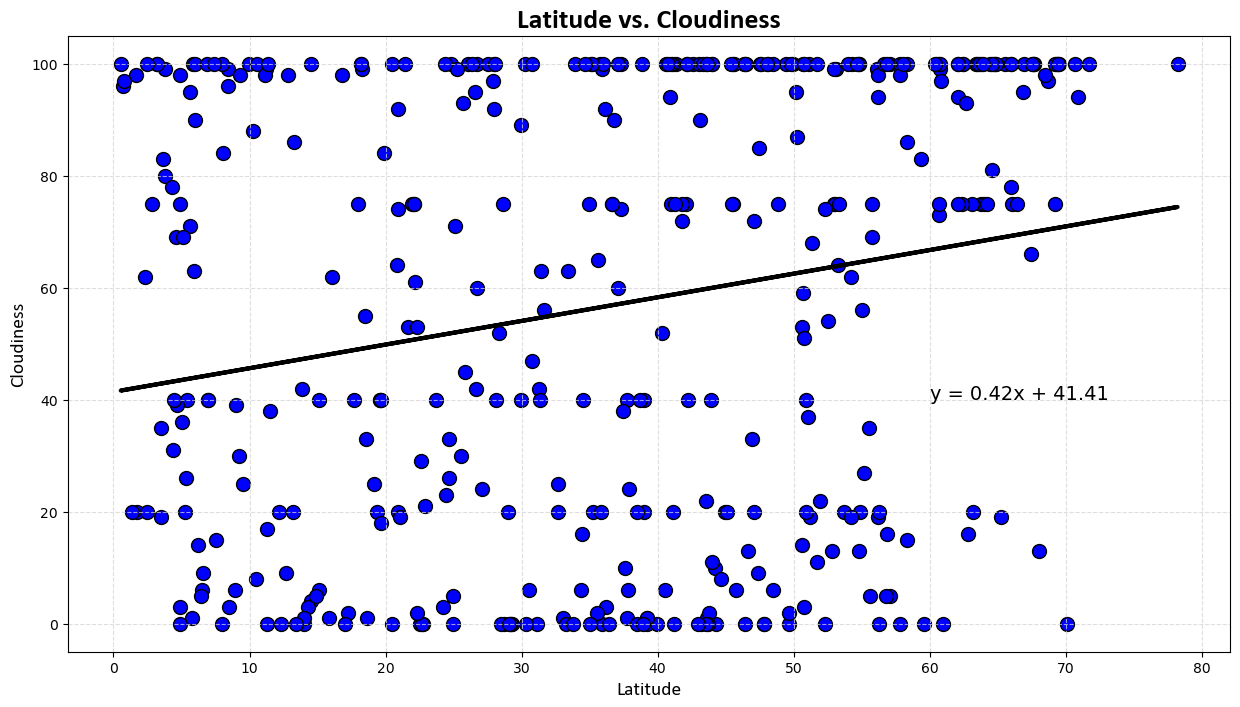

In [76]:
# Northern Hemisphere
x_values = northern_hemi_df.Lat
y_values = northern_hemi_df.Cloudiness
x_label = "Latitude"
y_label = "Cloudiness"
annotation = (60, 40)
do_regression_plot(x_values, y_values, x_label, y_label, annotation)

y = 0.33x + 70.55


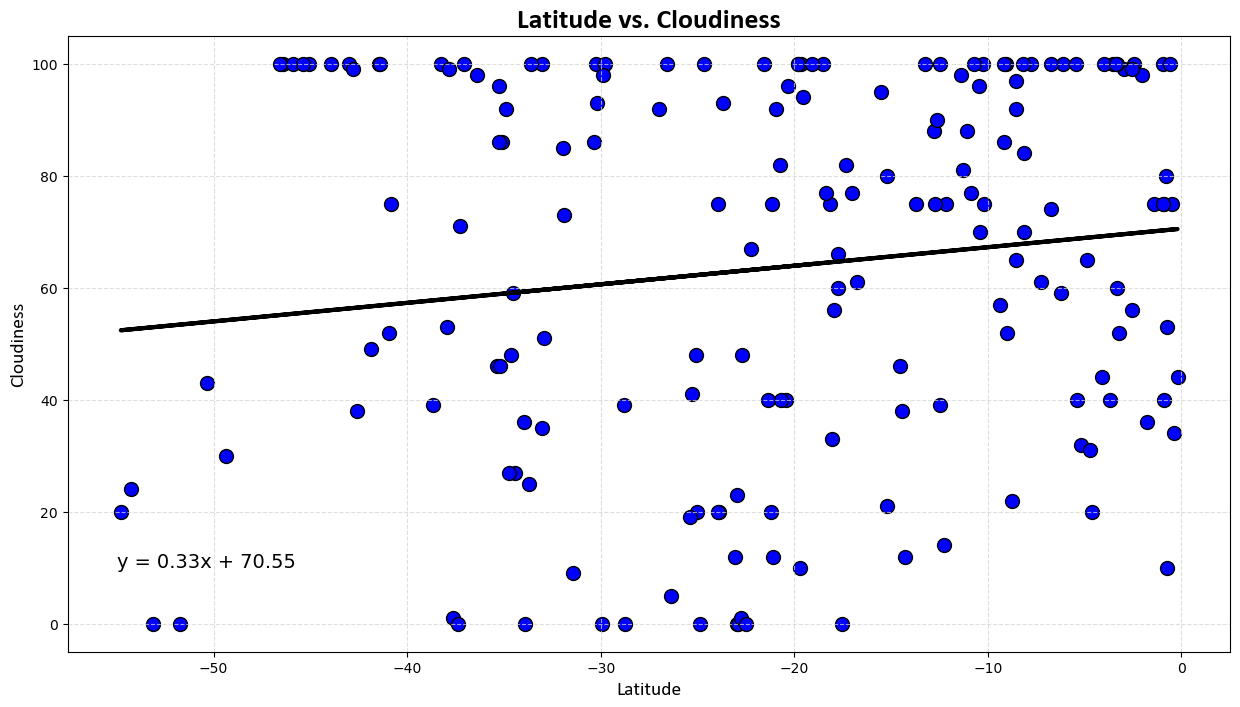

In [80]:
# Southern Hemisphere
x_values = southern_hemi_df.Lat
y_values = southern_hemi_df.Cloudiness
x_label = "Latitude"
y_label = "Cloudiness"
annotation = (-55, 10)
do_regression_plot(x_values, y_values, x_label, y_label, annotation)

**Discussion about the linear relationship:** Both the northern hemisphere and southern hemisphere show moderate positive linear relationships between cloudiness and latitude. This indicates potential relationships that can defined as: "Cloudiness may increase in the northern hemisphere as one moves away from the equator," and "Cloudiness may increase in the southern hemisphere as one moves toward from the equator." While some of this may be driven by bias in the random selection of cities, this outcome may have some geographical explanation, as well. Given the outcomes, one could hypothesize that natural features influence cloudiness in both hemispheres. In the northern hemisphere, the aforementioned desert regions, and their lower humidity, likely produce less cloud cover than the forest regions prominent in the central and northern bands of the northern hemisphere. Moisture and humidity from these regions could increase cloud cover regularly. Similarly, in the southern hemisphere dense regions of rain forest appear in South America and Africa in a global band just south of the equator. These dense, moisture-rich forests likely increase cloud cover as evaporation occurs, which is reflected in the outcome shown in the regression. That said, these linear relationships are not strong, which means these observations may not be causational. Further study of the hypothesis would be required to determine whether these relationships do, in fact, exist.

### Wind Speed vs. Latitude Linear Regression Plot

y = 0.01x + 8.57


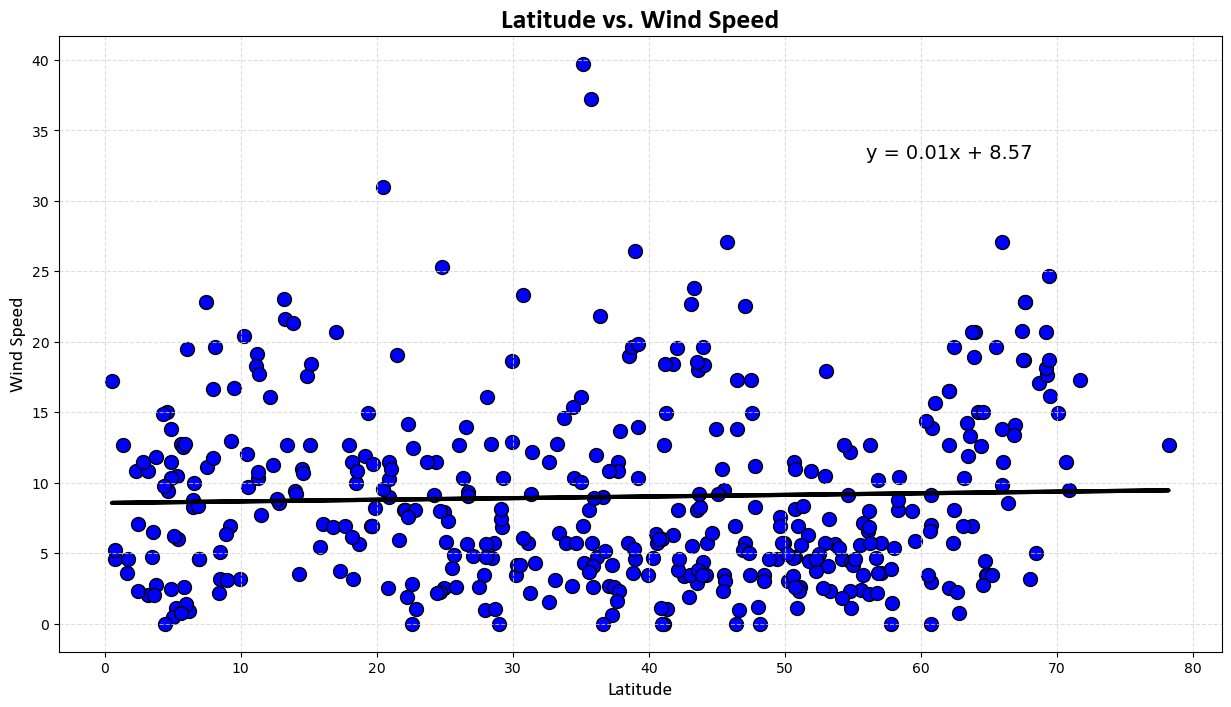

In [90]:
# Northern Hemisphere
x_values = northern_hemi_df.Lat
y_values = northern_hemi_df["Wind Speed"]
x_label = "Latitude"
y_label = "Wind Speed"
annotation = (56, 33)
do_regression_plot(x_values, y_values, x_label, y_label, annotation)

y = -0.1x + 6.6


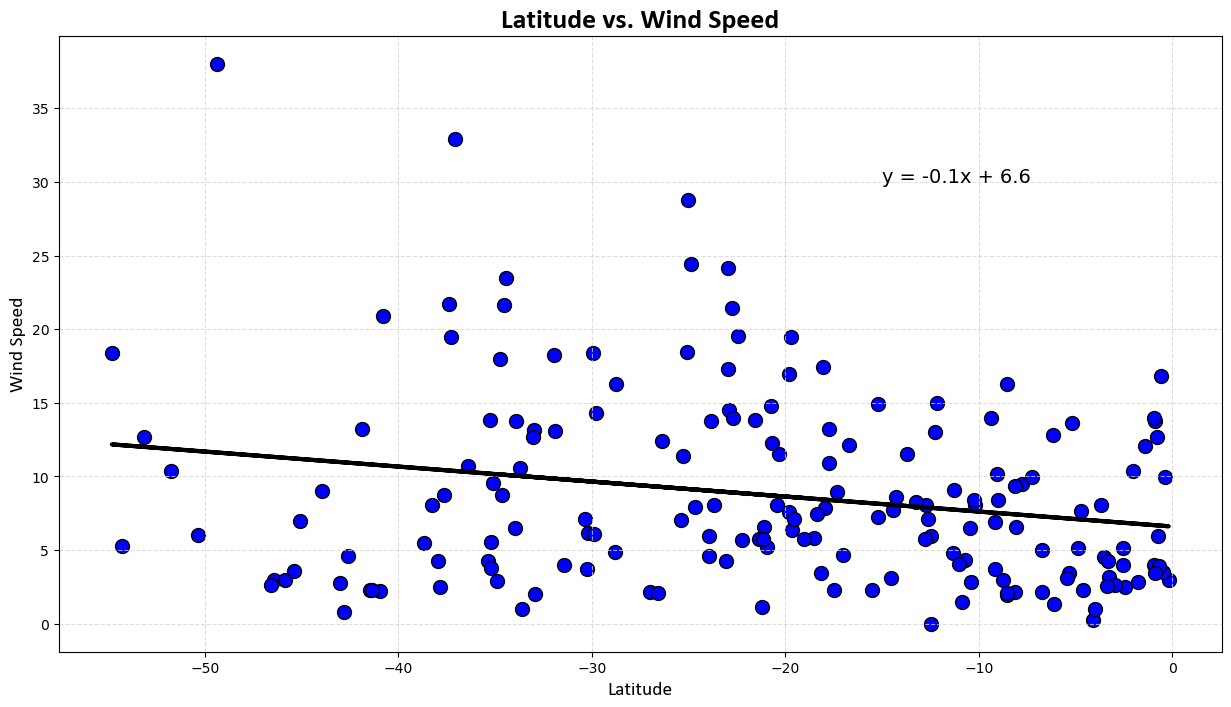

In [94]:
# Southern Hemisphere
x_values = southern_hemi_df.Lat
y_values = southern_hemi_df["Wind Speed"]
x_label = "Latitude"
y_label = "Wind Speed"
annotation = (-15, 30)
do_regression_plot(x_values, y_values, x_label, y_label, annotation)

**Discussion about the linear relationship:** In regard to wind speed, the regressions performed for the northern and southern hemisphere indicate there is no realtionship between wind speed and latitude in either hemisphere. While the southern hemisphere shows a slight correlation of -0.1, this is close enough to zero to suggest that no such relationship between these variables exists. The nothern hemisphere correlation is even smaller, showing a "flat" outcome of 0.01. This, too, shows no relationship exists between these variables in the nothern hemisphere. 